exchanges are initialized


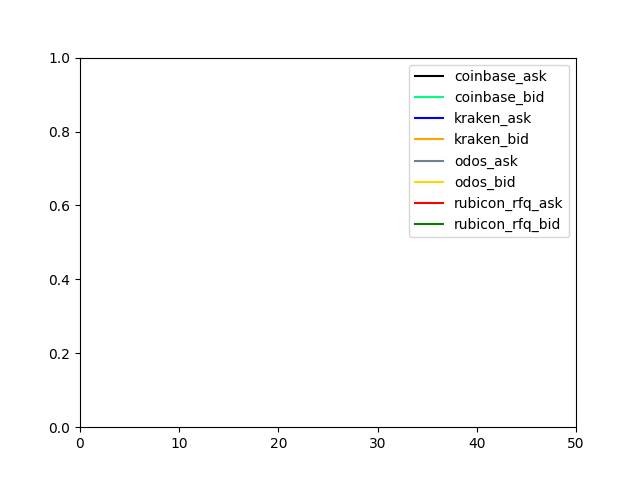

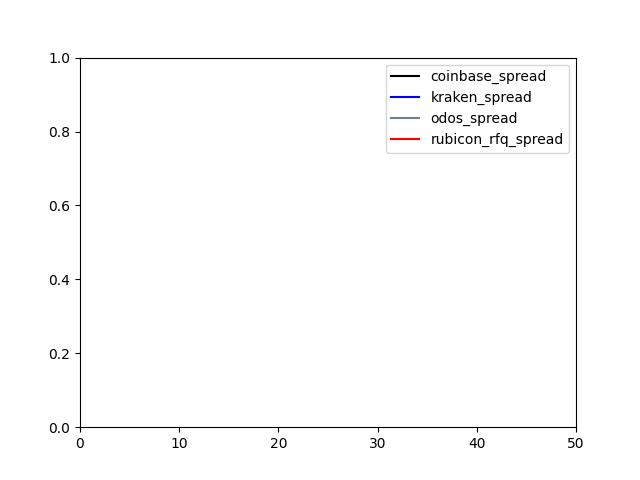

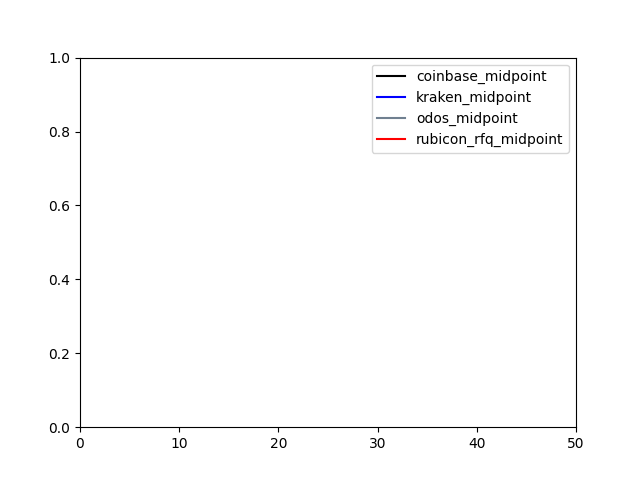

In [2]:
%matplotlib widget
from exchanges.dexes.rubicon_rfq import RubiconRFQ
from exchanges.cexes.kraken import Kraken
from exchanges.cexes.coinbase import Coinbase
from exchanges.aggregators.odos import Odos
from dotenv import dotenv_values
from market_viz.viz import MarketVisualization
import time

config = dotenv_values(".env")
poll = int(config["polling_interval"])

rfq = RubiconRFQ("https://rfq.rubicon.finance", config["chain_id"], 
                config["base"], config["quote"], "dr_dre", 
                config["rubicon_auth_key"], "true", poll)
coinbase = Coinbase(config["cb_pair"], poll)
kraken = Kraken(config["kraken_pair"], poll)
odos = Odos(config["chain_id"], config["base"], config["base_dec"],
           config["quote"], config["quote_dec"], config["base_amt"], config["quote_amt"], poll)

exchanges = [coinbase, kraken, odos]

for e in exchanges:
    e.start_polling()
    
# Wait for exchange data to be filled.
time.sleep(poll*2)
print("exchanges are initialized")

prices_viz = MarketVisualization(exchanges, "prices", poll*500)
prices_viz.start()

spreads_viz = MarketVisualization(exchanges, "spreads", poll*500)
spreads_viz.start()

spreads_viz = MarketVisualization(exchanges, "midpoints", poll*500)
spreads_viz.start()